# 4章

## はじめに

### まずはテキストを取得する

In [1]:
import requests

url = "http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt"
dic = {}

# ヘッダー情報を確認する
# content-lengthでファイルサイズを確認したかったが, 見当たらない・・・
response_header = requests.head(url)
print(response_header.headers)

# 本文を抜き出す
response = requests.get(url)
response.encoding = response.apparent_encoding # SHIFT_JIS

# str型のnekoに"吾輩は猫である"を格納する
neko = response.text 

# 確認
print(len(neko), neko[:400])

{'Date': 'Sat, 05 May 2018 13:43:57 GMT', 'Server': 'Apache/2.4.18 (Ubuntu)', 'Last-Modified': 'Thu, 19 Feb 2015 09:07:32 GMT', 'ETag': '"ebcc1-50f6d441d6f6f-gzip"', 'Accept-Ranges': 'bytes', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Content-Type': 'text/plain', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive'}
328721 一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。
しかしその当時は何という考もなかったから別段恐しいとも思わなかった。
ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである。
掌の上で少し落ちついて書生の顔を見たのがいわゆる人間というものの見始であろう。
この時妙なものだと思った感じが今でも残っている。
第一毛をもって装飾されべきはずの顔がつるつるしてまるで薬缶だ。
その後猫にもだいぶ逢ったがこんな片輪には一度も出会わした事がない。
のみならず顔の真中があまりに突起している。



### 次に形態素解析してneko.txt.mecabに保存する

In [2]:
import MeCab

# 解析結果を返す
m = MeCab.Tagger()

# parseはstr型に, parseToNodeはMeCab.Node型になる.
# この場合はstr型がほしいのでparseを用いる.
neko_mecab = m.parse(neko)

# ファイルに書き込み
path = "../data/"
with open(path + "neko.txt.mecab", "w") as f:
    f.write(neko_mecab)

print(neko_mecab[:200])

一	名詞,数,*,*,*,*,一,イチ,イチ
　	記号,空白,*,*,*,*,　,　,　
吾輩は猫である	名詞,固有名詞,一般,*,*,*,吾輩は猫である,ワガハイハネコデアル,ワガハイワネコデアル
。	記号,句点,*,*,*,*,。,。,。
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マ


## p30

### neko.txt.mecabを読み込んで1文ずつ形態素のリストにする.

In [3]:
from pprint import pprint
import re

# "\n"で区切ってリストに格納する
list = []
list = neko_mecab.split("\n")

pprint(list[:15])

['一\t名詞,数,*,*,*,*,一,イチ,イチ',
 '\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000',
 '吾輩は猫である\t名詞,固有名詞,一般,*,*,*,吾輩は猫である,ワガハイハネコデアル,ワガハイワネコデアル',
 '。\t記号,句点,*,*,*,*,。,。,。',
 '名前\t名詞,一般,*,*,*,*,名前,ナマエ,ナマエ',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ',
 'まだ\t副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ',
 '無い\t形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ',
 '。\t記号,句点,*,*,*,*,。,。,。',
 '\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000',
 'どこ\t名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ',
 'で\t助詞,格助詞,一般,*,*,*,で,デ,デ',
 '生れ\t動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ',
 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ',
 'かとん\t名詞,一般,*,*,*,*,火遁,カトン,カトン']


#### "\t"と ","で分割するのが良さそうなので, 分割する

In [4]:
from tqdm import tqdm

dic_list = []

for voc in list:
    # "\t"と ","で分割
    voc_ele = re.split("[\\t,]", voc)
    
#     print(voc_ele)
#     print(voc_ele[-3])
    
    
    # 辞書作成
    dic = {}
    
    try:
        dic["surface"] = voc_ele[0]
        dic["base"] = voc_ele[-3]
        dic["pos"] = voc_ele[1]
        dic["pos1"] = voc_ele[2]
        dic_list.append(dic)
    except:
        print("errors when vocabulary is " + voc)

print(len(dic_list))

errors when vocabulary is EOS
errors when vocabulary is 
202741


**EOS (End Of Sentence)**と**要素が空**のときにエラーが発生した  
無視しても問題なさそうなので無視する.  ここまでで1wordごとに辞書にできた

次は"。"で区切って一文と判断し, リストに格納する

In [5]:
# 空のリスト
sentence_list = []
sentence = []

for dic in dic_list:
    
    # もし文字の表層形が"。"だったらsentenceはsentence_listに格納.
    if dic["surface"] == "。":
        sentence.append(dic)
        sentence_list.append(sentence)
        
        # sentenceを空に戻す
        sentence = []
        
    # それ以外はsentenceに文字を追加
    else:
        sentence.append(dic)

# 2番目の文を表示
pprint(sentence_list[2])

[{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'surface': 'どこ'},
 {'base': 'で', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'で'},
 {'base': '生れる', 'pos': '動詞', 'pos1': '自立', 'surface': '生れ'},
 {'base': 'た', 'pos': '助動詞', 'pos1': '*', 'surface': 'た'},
 {'base': '火遁', 'pos': '名詞', 'pos1': '一般', 'surface': 'かとん'},
 {'base': 'と', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'と'},
 {'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '見当'},
 {'base': 'が', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'が'},
 {'base': 'つく', 'pos': '動詞', 'pos1': '自立', 'surface': 'つか'},
 {'base': 'ぬ', 'pos': '助動詞', 'pos1': '*', 'surface': 'ぬ'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]


## p31

In [6]:
verb_surface = []
for sen in sentence_list:
    for word in sen:
        if word["pos"] == "動詞":
            verb_surface.append(word["surface"])

pprint(verb_surface[:20])

['生れ',
 'つか',
 '泣い',
 'し',
 'いる',
 '始め',
 '見',
 '聞く',
 '捕え',
 '煮',
 '食う',
 '思わ',
 '載せ',
 'られ',
 '持ち上げ',
 'られ',
 'し',
 'あっ',
 '落ちつい',
 '見']


## p32

In [7]:
verb_base = []
for sen in sentence_list:
    for word in sen:
        if word["pos"] == "動詞":
            verb_base.append(word["base"])

pprint(verb_base[:20])

['生れる',
 'つく',
 '泣く',
 'する',
 'いる',
 '始める',
 '見る',
 '聞く',
 '捕える',
 '煮る',
 '食う',
 '思う',
 '載せる',
 'られる',
 '持ち上げる',
 'られる',
 'する',
 'ある',
 '落ちつく',
 '見る']


## p33

In [8]:
noun_no = []
for sen in sentence_list:
    for i, word in enumerate(sen):
        
        # 文頭に"の"がある場合は除外
        if i == 0:
            continue
            
        # 文中に"の"が出現するとき
        elif word["surface"] == "の":
            if sen[i-1]["pos"] == "名詞" and sen[i+1]["pos"] == "名詞":
                noun_no.append(sen[i-1]["surface"] + "の" + sen[i+1]["surface"])
                
pprint(noun_no[:20])

['彼の掌',
 '掌の上',
 '書生の顔',
 'はずの顔',
 '顔の真中',
 '穴の中',
 '書生の掌',
 '掌の裏',
 '何の事',
 '肝心の母親',
 '藁の上',
 '笹原の中',
 'ようやくの思い',
 '池の前',
 'ようやくの事',
 '一樹の蔭',
 '垣根の穴',
 '隣家の三毛',
 '時の通路',
 '一刻の猶予']


## p34

In [10]:
seq_noun_list = []
seq_noun = ""
count = 0

for sen in sentence_list:
    for word in sen:
        if word["pos"] == "名詞":
            count += 1
            seq_noun += word["surface"]
        else:
            if count > 1:
                seq_noun_list.append(seq_noun)
            count = 0
            seq_noun = ""


pprint(seq_noun_list[:30])            

['した所',
 '人間中',
 '一番獰悪',
 '時妙',
 '一毛',
 'その後猫',
 '一度',
 '邸内',
 '書生以外',
 '四五遍',
 'この間おさん',
 '三馬',
 '御台所',
 'まま奥',
 '終日書斎',
 '勉強家',
 '勉強家',
 '勤勉家',
 '二三ページ',
 '主人以外',
 '限り吾輩',
 '朝主人',
 '一番心持',
 '一つ床',
 '最後大変',
 '神経胃弱性',
 '言語同断',
 'しようもの',
 '家内総がかり',
 '筋向']


## p35

In [28]:
from collections import Counter

word_list = []
for sen in sentence_list:
    for word in sen:
        word_list.append(word["surface"])
        
counter = Counter(word_list)
rank = 0

label = []
height = []

for word, count in counter.most_common():
    print(word, count)
    label.append(word)
    height.append(count)
    rank += 1
    if rank > 9 : break

の 9112
。 7484
、 6772
て 6703
は 6384
に 6190
を 6068
と 5483
が 5260
た 3916


## p36

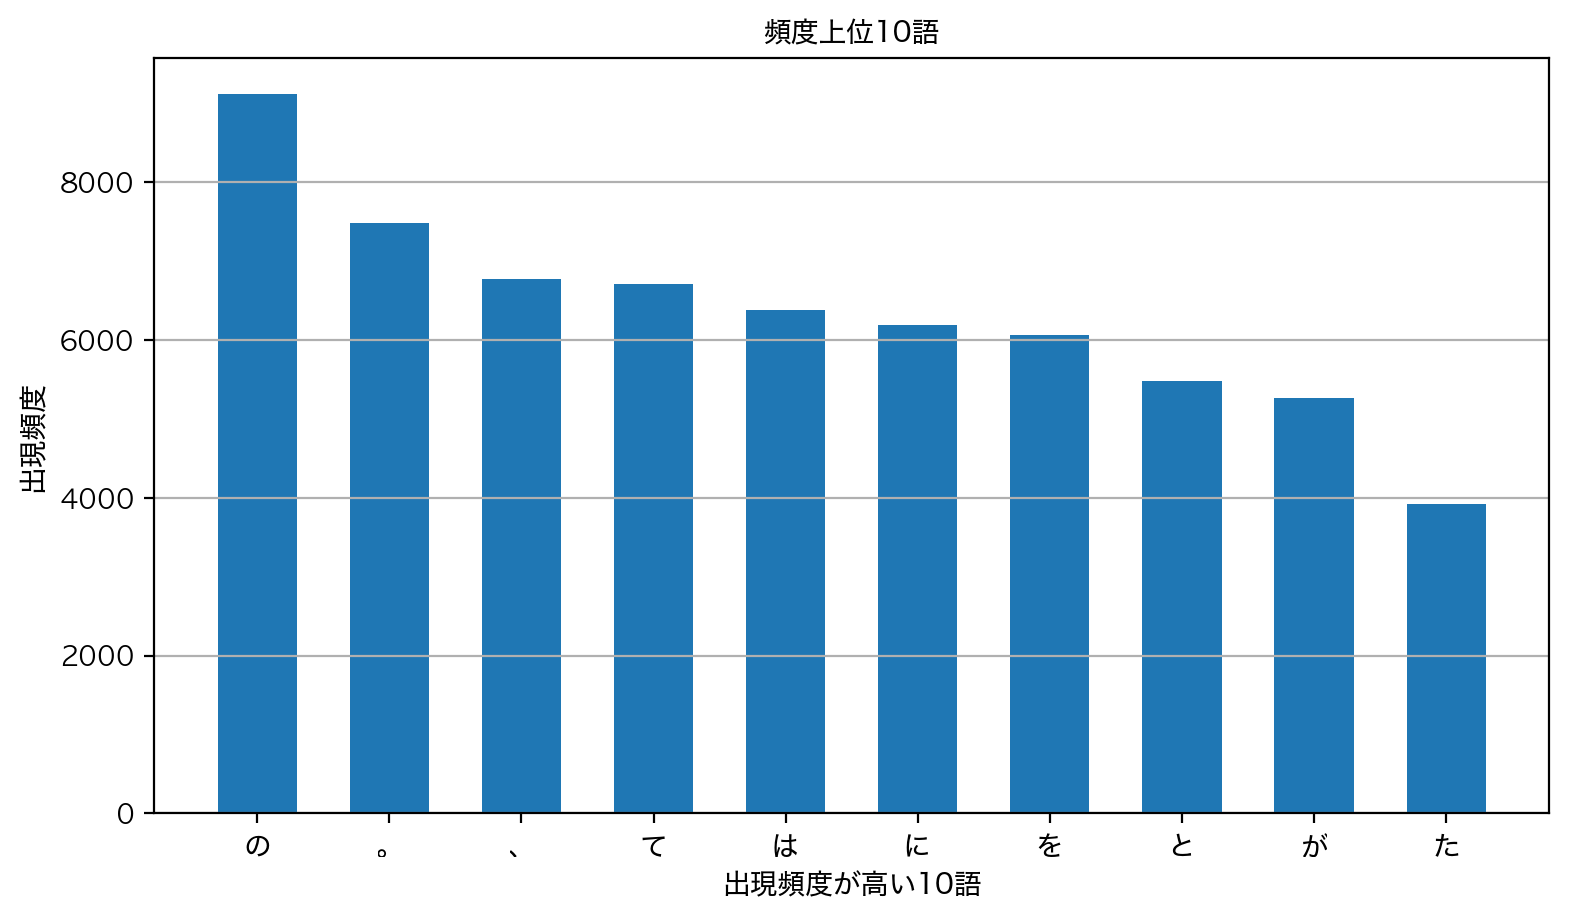

In [77]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 日本語文字化け対策
# font = {'family': 'AppleGothic'}
# matplotlib.rc('font', **font)

fp = FontProperties(
    fname='/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
)

plt.figure(figsize=(9,5),dpi=200)

plt.title('頻度上位10語', fontproperties=fp)

plt.xlabel('出現頻度が高い10語', fontproperties=fp)

plt.ylabel('出現頻度', fontproperties=fp)

plt.xticks(
    range(0,10),
    label,
    fontproperties=fp
)

plt.grid(axis='y')

plt.bar(left, height, align = "center", width = 0.6)

plt.show()

## p37

## p38

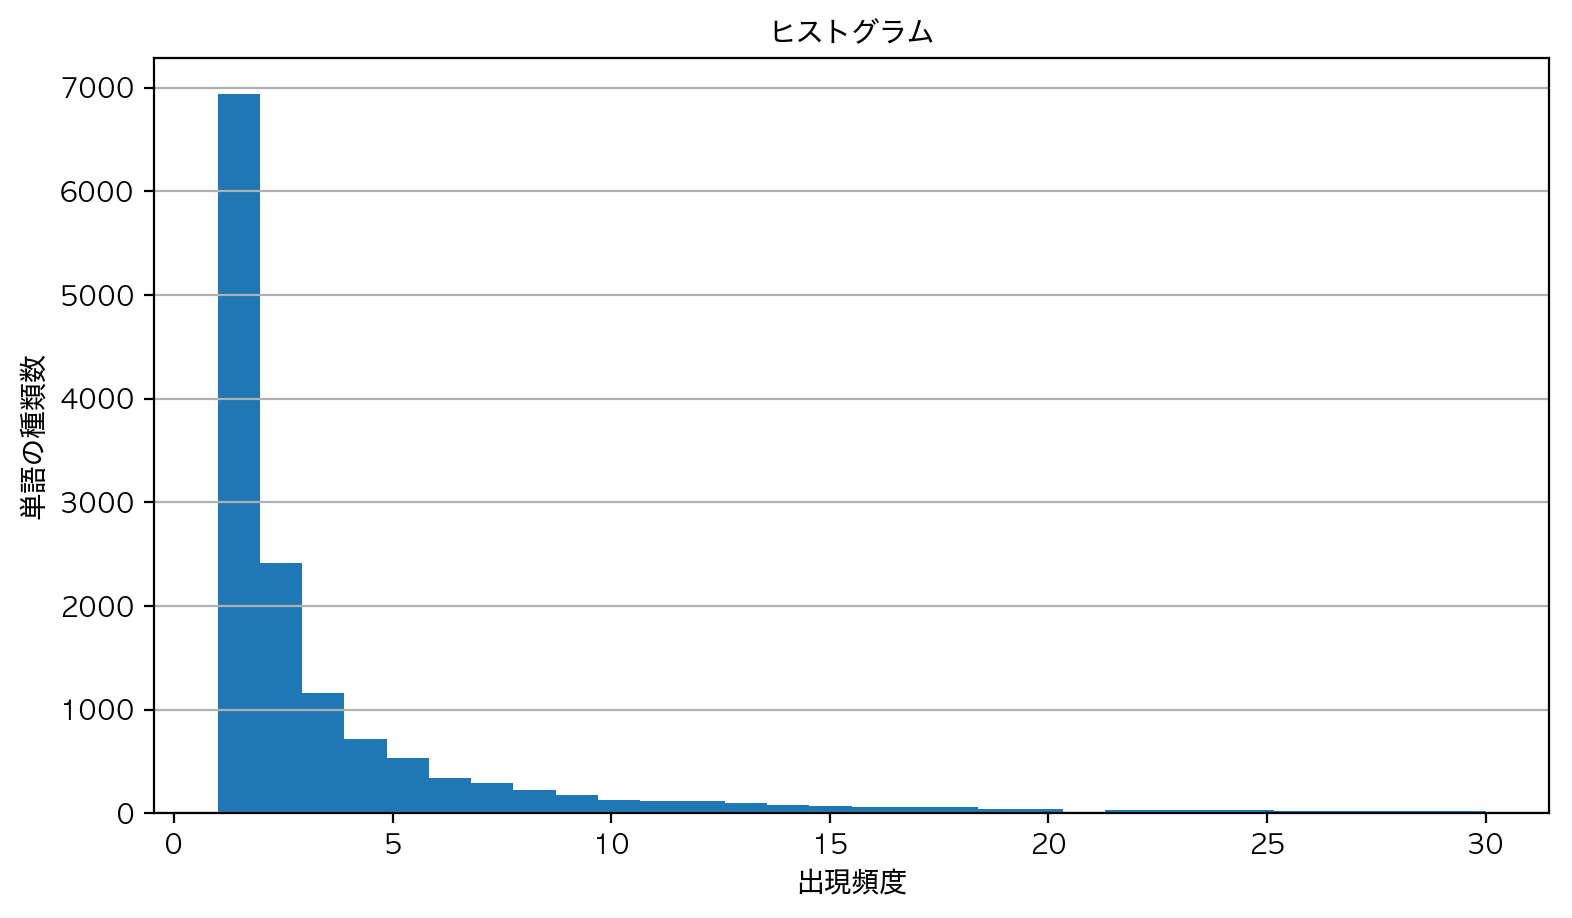

In [84]:
freq = counter.values()

plt.figure(figsize=(9,5),dpi=200)

plt.title('ヒストグラム', fontproperties=fp)
plt.xlabel('出現頻度', fontproperties=fp)
plt.ylabel('単語の種類数', fontproperties=fp)
plt.grid(axis='y')

plt.hist(height_hist, bins = 30, range=(1,30))

plt.show()

## p39

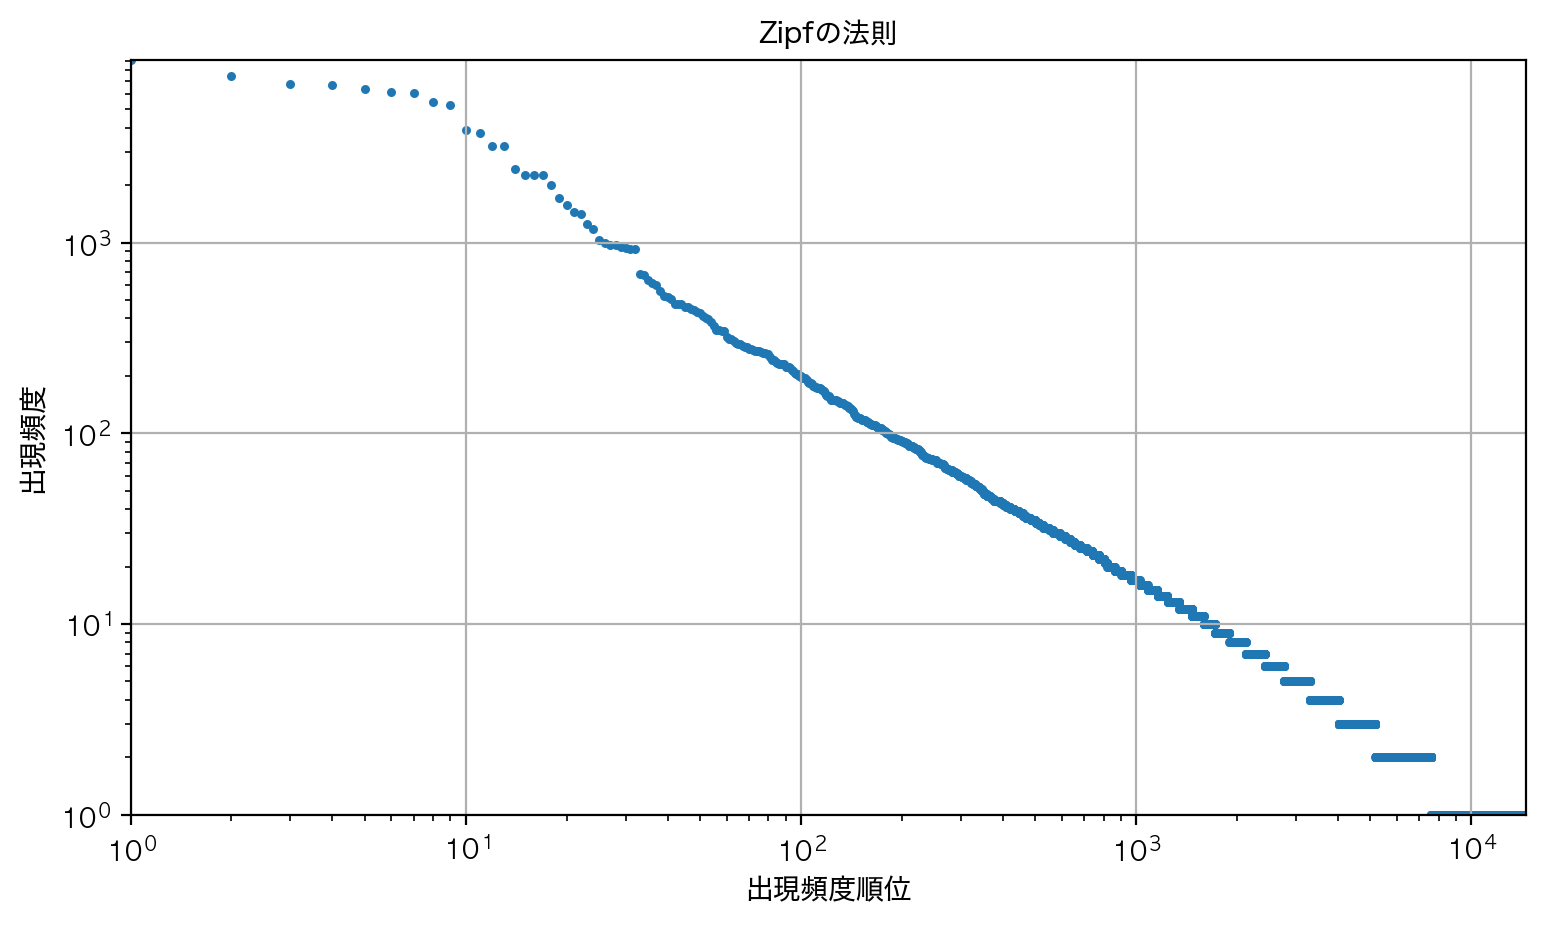

In [98]:
zipf_freq = []

for word, count in counter.most_common():
    zipf_freq.append(count)
    
zipf_rank = [i for i in range(1,len(zipf_freq) + 1)]

plt.figure(figsize=(9,5),dpi=200)

plt.scatter(zipf_rank,zipf_freq, s = 5)

plt.xlim(1, zipf_rank[-1])
plt.ylim(1, zipf_freq[0])

plt.xscale('log')
plt.yscale('log')

plt.title('Zipfの法則', fontproperties=fp)
plt.xlabel('出現頻度順位', fontproperties=fp)
plt.ylabel('出現頻度', fontproperties=fp)
plt.grid(axis='both')

plt.show()